# Investigate a Dataset- Identifying Factors that Predict Missed Appointment Among Patients in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li> 
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis and Draw Conclusions</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I analysed the *[no-show appointments](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub)* dataset to identify factors that predicts if a patient will show-up for scheduled appointment.
### Dataset
The *No-show appointments* dataset collects information from 100,000 medical appointments in Brazil. A number of
characteristics about the patient are included in each row. The variable included in the dataset are *patient ID, appointment ID, gender, scheduled day, appointment day, neighbourhood, scholarship, hypentention, diabetes, alcoholism, handicap, SMS received and no-show*. 
* *ScheduledDay* tells us on what day the patient set up their appointment.
* *Neighborhood* indicates the location of the hospital.
* *Scholarship* indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).<br>

Note that the 'No-show' column says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Analysis Approach
This analysis was done systematically using 5-step approach.
1. **Questions:** In this step, I choose a dataset and brainstormed some questions I could answer using the chosen dataset. I ensured the questions were SMART.
2. **Wrangling:** Gathered, assessed and cleaned data using *pandas* and *numpy* libraries in *Python*
3. **Exploratory Data Analysis (EDA):** Explored the data and created visuals to get clarity of the dataset and maximise the potential of the analysis.*pandas*, *numpy* and *matplotlib* libraries in *Python*
4. **Draw Conclusions:** Intepreted the result from the visualisations and descriptive statistical analysis done. This step was done concurrently with EDA.
5. **Communicate:** Communicated insights in this *Jupyter Notebook*.

<a id='question'></a>
## Questions
In this step, I choose a dataset and brainstormed some questions I could answer using the chosen dataset. The *no-show appointments* dataset was analysed to answer the following questions:
1. **What factors are important to predict if a patient will show up for scheduled appointment?**
2. **Is duration (appointment day - scheduled day) associated with no-show?**

In [1]:
# import packages that will be used for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section, the dataset was loaded, checked for cleanliness, and trimmed and cleaned for analysis.
### General Properties

In [2]:
# Load dataset and print out a few lines.
df = pd.read_csv('Dataset_No_Show_Appointment.csv')
df.head()

#hint: df = pd.read_csv('Dataset_No_Show_Appointment.csv', parse_dates = ['ScheduledDay', 'AppointmentDay'])
#con: knowing the column to parse as datetime beforehand

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Assess number of samples and columns in dataset
df.shape

(110527, 14)

In [4]:
#Assess range of each variable and get hit into its datatype
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# inspect datatype of columns and check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
#Assess for uniqueness and category of unique value in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
# check for duplicates due to spelling error etc
df.Neighbourhood.unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

This dataset has 110,527 rows and 14 columns.

**Data Dictionary**

| Column | Datatype | Description |
| --- | --- | --- |
| PatientId | Float | Identification of a patient |
| AppointmentID | Int | Identification of each appointment |
| Gender | Object | M - Male or F - Female |
| ScheduledDay | Object | The day someone called or registered the appointment |
| AppointmentDay | Object | The day of the actual appointment, when they have to visit the hospital |
| Age | Int | How old is the patient in years. |
| Neighbourhood | Object | Where the hospital is located |
| Scholarship | Int | indicates whether or not the patient is enrolled in Brasilian <br> welfare program Bolsa Família. 0 - True or 1 - False |
| Hipertension | Int | 0 - True or 1 - False|
| Diabetes | Int | 0 - True or 1 - False|
| Alcoholism | Int | 0 - True or 1 - False |
| Handcap | Int | 0, 1, 2, 3, 4 - there was no dictionary explaining what each represents|
| SMS_received | Int | 1 or more messages sent to the patient: 0 - True, 1 - False |
| No-show | Object | No - Show or Yes - No Show |

> Information about the dataset was found at <a href="https://www.kaggle.com/joniarroba/noshowappointments/data" target="_blank">here</a> and <a href="https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True" target="_blank">here</a>


### Data Cleaning: No-Missed Appointment Dataset
**Notes for Cleaning**

1. Rename Columns <br> a. Spelling of 'hipertension' and 'handcap' <br> b. Use snake case for scheduled day, appointment day and no-show <br> c. Change all header to lower case

2. Implausible data <br> Negative age: as seen in minimum value in describe, it is not possible for age to be -1

3. Nulls <br> No null in dataset

4. Change Datatype <br> The datatype of some variables is not a fit for the variable. Therefore change: <br> a. PatientId: float to sting <br> b. Appointmentid: int to string <br> c. scheduled day*: Object to date object <br> d. appointment day*: object to date object <br> e. scholarship, hypertension, diabetes, alcohlism, handicap, SMS_received: from int to object

>Thought to change the datatype as they are categorical variable. This affected the type of analysis I could do...

5. Check for duplicates <br> No duplicates in dataset

6. check for uniqueness <br> No wrong spelling or duplicate of same category in columns

7. Drop columns or not? <br> I decided against dropping columns as I can't tell what column will be correlated. From the dataset info, it is obvious there were patients with multiple appointments. One might want to study patient appointment outcome in multiple appointments.

**For Analysis**

1. consider creating derived column- duration (calculated as Appointment day - scheduled day
2. categorise age into 5-years bands for analysis


In [10]:
# rename Columns
df.rename(columns = {'PatientId':'Patient_ID', 'AppointmentID': 'Appointment_ID',
                     'ScheduledDay': 'Scheduled_Day','AppointmentDay':'Appointment_Day', 
                     'Hipertension':'Hypertension', 'Handcap': 'Handicap', 'No-show': 'No_show'}, inplace = True)

# use lower case label
df.rename(columns=lambda x: x.lower(), inplace=True)

# confirm changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [11]:
# drop row with implausible age (-1)
df.drop( df[ df['age'] == -1 ].index , inplace=True)

# confirm changes
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [12]:
# Change datatype

# change float to int
df['patient_id'] = df['patient_id'].astype(int)

# change int to strings
int_columns = ['patient_id', 'appointment_id']
for c in int_columns:
    df[c] = df[c].astype(str)

# change string to datetime

datetime_columns = ['scheduled_day', 'appointment_day']
for c in datetime_columns:
    df[c] = pd.to_datetime(df[c])
    

# convert int to categorical

int_columns = ['scholarship', 'hypertension', 'alcoholism', 'diabetes', 'handicap', 'sms_received', 'no_show']
               
for c in int_columns:
    df[c] = df[c].astype('str')

    
#confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  object             
 1   appointment_id   110526 non-null  object             
 2   gender           110526 non-null  object             
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  object             
 8   hypertension     110526 non-null  object             
 9   diabetes         110526 non-null  object             
 10  alcoholism       110526 non-null  object             
 11  handicap         110526 non-null  object             
 12  sms_received     110526 non-null  object             
 13 

In [13]:
# derive duration (appointment day - scheduled day)

df['duration'] = (df['appointment_day'] - df['scheduled_day']).astype('timedelta64[D]')

df['duration'].value_counts()

-1.0      38562
 1.0       6725
 3.0       5290
 0.0       5213
 6.0       4906
          ...  
 150.0        1
 126.0        1
 138.0        1
-7.0          1
 116.0        1
Name: duration, Length: 131, dtype: int64

*My Note:Reviewed the data and found that the -1 were same day appointments, scheduled in less than 24hours. Is there a way to subtract datetime without the time component? Decided to drop rows with less than -1 as they had appointment day before scheduled day. Possibly entry error but no way to confirm that.*

In [14]:
# assess implausible duration
df[df['duration'] < -1] 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,duration
27033,-2147483648,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2.0
55226,-2147483648,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2.0
64175,-2147483648,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2.0
71533,-2147483648,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7.0
72362,-2147483648,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2.0


In [15]:
# drop row with implausible duration that is appointment day before scheduled day (-1)
df.drop( df[ df['duration'] < -1 ].index , inplace=True)

#check changes
df['duration'].describe()

count    110521.000000
mean          9.184345
std          15.255153
min          -1.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: duration, dtype: float64

<!-- After analysing, I did not find a need for this, so I changed it to a markdown as I wanted to keep the code for learning purposes. To categorise age:
bins= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 150]
labels = ['<4','5-9','10-14','15-19','20-24', '25-29', '30-34', '35-39', '40-44', '45-59', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
confirm changes
df['age_group'].value_counts() -->

In [16]:
df.shape

(110521, 15)

In [17]:
df.describe()

,age,duration
count,110521.000000,110521.000000
mean,37.089386,9.184345
std,23.109885,15.255153
min,0.000000,-1.000000
25%,18.000000,-1.000000
50%,37.000000,3.000000
75%,55.000000,14.000000
max,115.000000,178.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110521 non-null  object             
 1   appointment_id   110521 non-null  object             
 2   gender           110521 non-null  object             
 3   scheduled_day    110521 non-null  datetime64[ns, UTC]
 4   appointment_day  110521 non-null  datetime64[ns, UTC]
 5   age              110521 non-null  int64              
 6   neighbourhood    110521 non-null  object             
 7   scholarship      110521 non-null  object             
 8   hypertension     110521 non-null  object             
 9   diabetes         110521 non-null  object             
 10  alcoholism       110521 non-null  object             
 11  handicap         110521 non-null  object             
 12  sms_received     110521 non-null  object             
 13 

This dataset has 110,521 rows and 15 columns.

**Clean Data Dictionary**

| Column | Datatype | Description |
| --- | --- | --- |
| patient_id | str | Identification of a patient |
| appointment_id | str | Identification of each appointment |
| gender | str | 1 - Male or 0 - Female |
| scheduled_day | datetime | The day someone called or registered the appointment |
| appointment_day | datetime | The day of the actual appointment, when they have to visit the hospital |
| age | Int | How old is the patient in years. |
| neighbourhood | str | Where the hospital is located |
| scholarship | str | indicates whether or not the patient is enrolled in Brasilian <br> welfare program Bolsa Família. 0 - True or 1 - False |
| hypertension | str | 0 - True or 1 - False|
| aiabetes | str | 0 - True or 1 - False|
| alcoholism | str | 0 - True or 1 - False |
| handicap | str | 0, 1, 2, 3, 4 - there was no dictionary explaining what each represents|
| sms_received | str | 1 or more messages sent to the patient: 0 - True, 1 - False |
| no_show | str | No - Show or Yes - No Show |
| duration | float | calculated by susbtracting appointment day from scheduled day (days)|

### <a id='eda'></a>
## Exploratory Data Analysis and Draw Conclusions

### Research Question 1- 'What factors associated with no-show for scheduled appointment?'

In [19]:
no_show_total = df.groupby('no_show').count()['patient_id']
no_show_total

no_show
No     88207
Yes    22314
Name: patient_id, dtype: int64

In [20]:
#group the independent variable
showed = df.no_show == 'No'
missed = df.no_show == 'Yes'

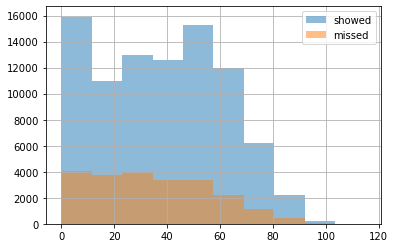

In [21]:
df.age[showed].hist(alpha=0.5, label = 'showed')
df.age[missed].hist(alpha=0.5, label = 'missed')
plt.legend();

In [22]:
df.age[showed].median()

38.0

In [23]:
df.age[missed].median()

33.0

**a. Is age associated with no-show?**

Age is numerical and skewed, hence the best descriptive statistics will be median.
Younger people missed more appointments when compared against the age of those who show-up for appointment. Overall sample size per age might have play a role in this.
Compared with other ages, those less than 10 show-up for most appointments.

for <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html" target="_blank">crosstab</a>



In [24]:
# df.groupby('diabetes').showed.median() #this didnt work

# this didn't work. All efforts to troubleshot it - including changing datatype, failed.

In [25]:
# frequency table for gender by no-show

summary_gender = pd.crosstab(index=df['gender'], columns=df['no_show'], margins =True)
summary_gender['proportion'] = summary_gender['Yes']/summary_gender['All']*100
print(summary_gender)

no_show     No    Yes     All  proportion
gender                                   
F        57245  14591   71836   20.311543
M        30962   7723   38685   19.963810
All      88207  22314  110521   20.189828


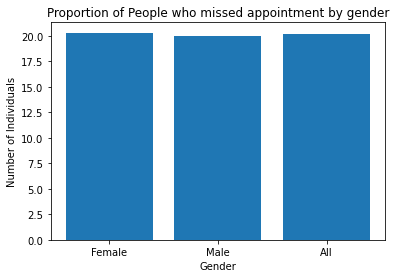

In [26]:
# Create a bar chart
locations = [1, 2, 3]
heights = summary_gender['proportion']
labels = ['Female', 'Male', 'All']
plt.bar(locations, heights, tick_label=labels)
plt.title('Proportion of People who missed appointment by gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals');

**b. Which gender miss appointment more?**

Although the number of female was almost 2x the number of males, 20.31% of female missed appointment compared to 19.96% of male. A statistical test (chi-squared) who be perfect to assess this association.

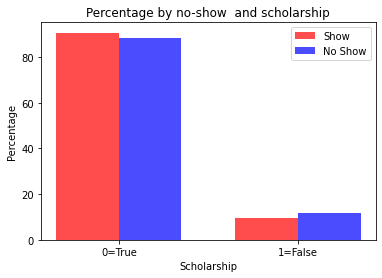

In [27]:
scholarship_counts = df.groupby([ 'no_show', 'scholarship']).count()['patient_id']
scholarship_proportions = (scholarship_counts['No'] / no_show_total['No']) * 100
scholarship_proportions2 = (scholarship_counts['Yes'] / no_show_total['Yes']) * 100

ind = np.arange(len(scholarship_proportions))
width = 0.35

# plot bars
No_bars = plt.bar(ind, scholarship_proportions, width, color='r', alpha=.7, label='Show')
Yes_bars = plt.bar(ind + width, scholarship_proportions2, width, color='b', alpha=.7, label='No Show')

# title and labels
plt.ylabel('Percentage')
plt.xlabel('Scholarship')
plt.title('Percentage by no-show  and scholarship')
locations = ind + width / 2  # xtick locations
labels = ['0=True', '1=False']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

In [28]:
# frequency table for gender by no-show
summary_scholarship = pd.crosstab(index=df['scholarship'], columns=df['no_show'], margins =True)
summary_scholarship['proportion'] = summary_scholarship['Yes']/summary_scholarship['All']*100
print(summary_scholarship)

no_show         No    Yes     All  proportion
scholarship                                  
0            79924  19736   99660   19.803331
1             8283   2578   10861   23.736304
All          88207  22314  110521   20.189828


**c. What is the association between scholarship and no-show?** <br>
Although the number of people on scholarship was 9x those without scholarship, 23.7% of those without scholarship missed appointment compared to 19.8% of among patients with scholarship. A statistical test (chi-squared) who be perfect to assess this association

In [29]:
# frequency table for category variables
summary_table = pd.crosstab(index=df['handicap'], columns=df['no_show'], margins =True)
summary_table['proportion'] = summary_table['Yes']/summary_table['All']*100
print(summary_table)

no_show      No    Yes     All  proportion
handicap                                  
0         86373  21909  108282   20.233280
1          1676    364    2040   17.843137
2           146     37     183   20.218579
3            10      3      13   23.076923
4             2      1       3   33.333333
All       88207  22314  110521   20.189828


I decided to not conduct deepdive on the association of handicap and appointment as there was no information on what each category represents. In the real world, I would seek such information and conduct the analysis as it can be hypothesised that handicap status will be associated with missed apppointments.

### Research Question 2- Is duration (appointment day - scheduled day) associated with no-show?

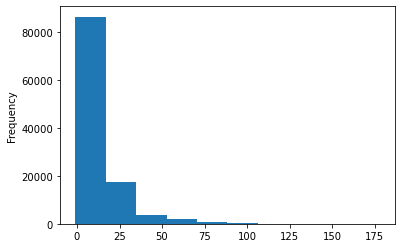

In [30]:
df['duration'].plot(kind='hist');

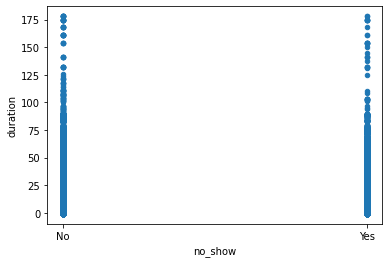

In [31]:
df.plot(x='no_show', y='duration', kind='scatter');

In [32]:
df.duration[showed].median()

1.0

In [33]:
df.duration[missed].median()

10.0

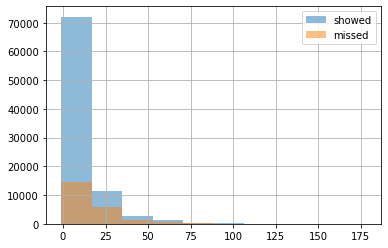

In [34]:
df.duration[showed].hist(alpha=0.5, label = 'showed')
df.duration[missed].hist(alpha=0.5, label = 'missed')
plt.legend();

The median duration(days) for those who showed for appointment and missed appointment was 1 and 10 respectively. This indicates that the closer an appointment is to the schedule day is a factor to consider in no-show. <br> Overall, patients showed the most for appointments <20 days.

<a id='conclusions'></a>
## Conclusions
In response to the analysis questions posed, the findings indicates the following.
1. What factors are important to predict if a patient will show up for scheduled appointment?<br>
> *age, gender and scholarship* are important to predict if a patient will show for appointment.

2. Is duration (appointment day - scheduled day) associated with no-show?<br>
>Yes, duration is associated with no-show. More patients showed for appointments with a duration that is shorter than 20 days.

Based on the results from this analysis, it is recommended that shorter duration be given to patients seeking appointments. Also, SMS or email reminder should be considered and targeted to patients who are more likely to miss appointments. These includes those 10+ years old, females and people not on scholarship.
### Limitation(s)
* Information on the coding for handicap status was not provided.
* No statistical tests was done, therefore no statistical conclusions can be drawn.
